<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_04_ANN_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
# import iris dataset (comes with seaborn library)
import seaborn as sns
from IPython import display
display.set_matplotlib_formats("svg")

## Multilayer NN

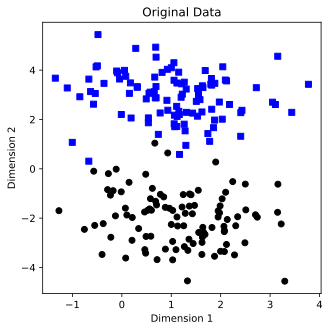

In [2]:
# create the data
nPerClust = 100
blur = 1

A = [1,3]
B = [1,-2]

# Generate the data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# Concatenate into a matrix
data_np = np.hstack((a,b)).T

# Convert into Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Visualize
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko")
plt.title("Original Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### Create Functions to Run the Model

In [3]:
ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
    )
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [4]:
def createANNmodel(learningRate):

    # Model Architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
        )
    
    # define the loss function
    lossfun = nn.BCELoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

    # Model Output
    return ANNclassify, lossfun, optimizer

In [5]:
# Define the function that trains the model
numepochs = 1000

def trainTheModel(ANNclassify):

    # initialize the losses
    losses = torch.zeros(numepochs)

    # loop over the epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNclassify(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final Forward Pass
    predictions = ANNclassify(data)

    # compute the accuracy
    totalacc = 100*torch.mean(((predictions > 0.5) == labels).float())

    return losses, predictions, totalacc

In [6]:
# Run it once
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

# run the model
losses, predictions, totalacc = trainTheModel(ANNclassify)

print("Model Accuracy is {}%".format(totalacc))

Model Accuracy is 99.0%


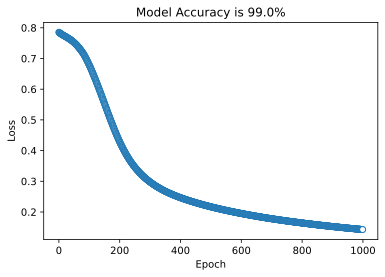

In [7]:
# Plot the whole thing
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Accuracy is {}%".format(totalacc))
plt.show()

In [8]:
# For fancy plotting
predlabels = predictions > 0.5
# find errors
misclassified = np.where(predlabels != labels)[0]

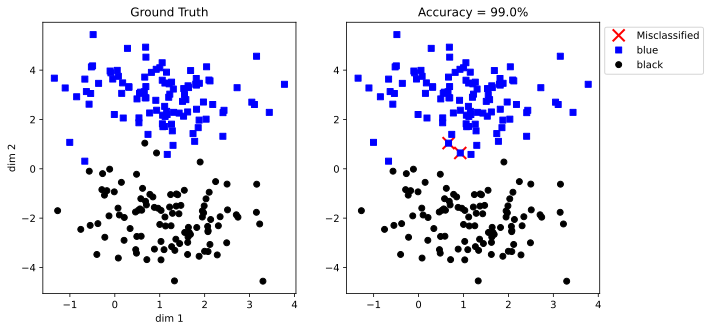

In [9]:
# Put all together
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs")
ax[0].plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko")
ax[0].set_title("Ground Truth")
ax[0].set_xlabel("dim 1")
ax[0].set_ylabel("dim 2")

ax[1].plot(data[misclassified,0], data[misclassified,1], "rx", markersize=12, markeredgewidth=2)
ax[1].plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], "bs")
ax[1].plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], "ko")
ax[1].legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1,1))
ax[1].set_title("Accuracy = {}%".format(totalacc))

plt.show()

### Vary learning rate

In [10]:
learningrates = np.linspace(0.001, 0.1, 50)

# initialize accuracy by learning rate
accByLr = []
allLosses = np.zeros((len(learningrates), numepochs))

# run the loop
for i, lr in enumerate(learningrates):

    # Create-run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions,totalacc = trainTheModel(ANNclassify)

    # store the values
    accByLr.append(totalacc)
    allLosses[i,:] = losses.detach()

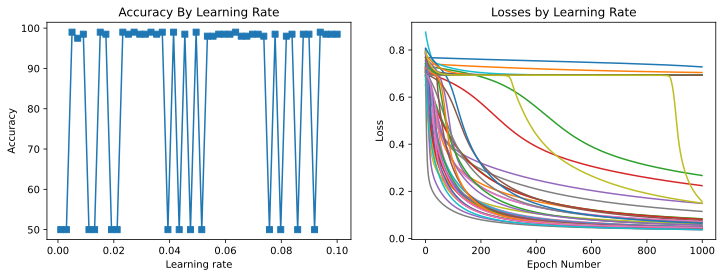

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLr, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy By Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by Learning Rate")
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
 
plt.show()
# Performance seems better than simple single layered one

In [12]:
# Performance above 70%
sum(torch.tensor(accByLr)>70)/len(accByLr)

tensor(0.7200)

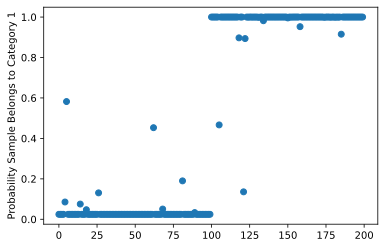

In [13]:
# Explore predictions
plt.plot(predictions.detach(), "o")
plt.ylabel("Probability Sample Belongs to Category 1");

In [14]:
sum(predictions > 0.5)/len(predictions)

tensor([0.4950])

In [15]:
sum((predictions > 0.5) == labels)/len(predictions)

tensor([0.9850])

In [16]:
# To convert true and false into numbers, use float
((predictions > 0.5) == labels).float()[1:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [17]:
# Finally take the average
torch.mean(((predictions > 0.5) == labels).float())

tensor(0.9850)

In [18]:
# Rerun the same experiment above 50 times and average the results
# Number of iterations (this takes about 12 minutes!)
numExps = 50
learningrates = np.linspace(0.001, 0.1, 50)

# matrix to store all the results
accMeta = np.zeros((numExps, len(learningrates)))

# reduce the number of epochs for efficiency
numepochs = 500

for expi in range(numExps):
    for i, lr in enumerate(learningrates):

        # Create and run the model
        # Create-run the model
        ANNclassify, lossfun, optimizer = createANNmodel(lr)
        losses, predictions,totalacc = trainTheModel(ANNclassify)


        # store the results
        accMeta[expi,i] = totalacc

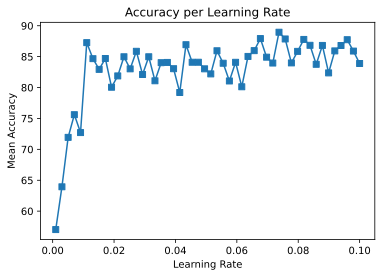

In [19]:
plt.plot(learningrates, np.mean(accMeta,axis=0), "s-")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy per Learning Rate")
plt.show()

## Linear Solutions to Linear Problems

In [20]:
# Rerun the multilayer code aove, but remove nonlinear activation functions from hidden layers
# Compare its performance with the original model
# remove the non-linear classifiers from the model
def createANNmodel(learningRate):

    # Model Architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        #nn.ReLU(),
        nn.Linear(16,1),
        #nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
        )
    
    # define the loss function
    lossfun = nn.BCELoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

    # Model Output
    return ANNclassify, lossfun, optimizer

In [21]:
learningrates = np.linspace(0.001, 0.1, 50)

# initialize accuracy by learning rate
accByLr = []
allLosses = np.zeros((len(learningrates), numepochs))

# run the loop
for i, lr in enumerate(learningrates):

    # Create-run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions,totalacc = trainTheModel(ANNclassify)

    # store the values
    accByLr.append(totalacc)
    allLosses[i,:] = losses.detach()

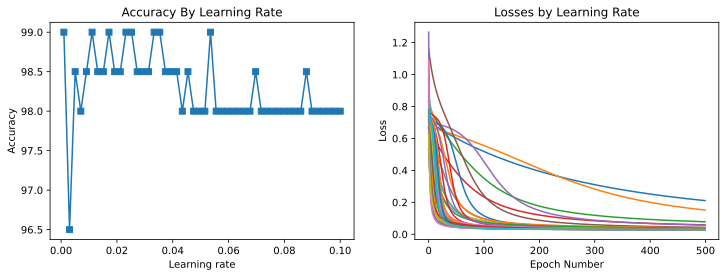

In [22]:
# Min 98% accuracy
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLr, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy By Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by Learning Rate")
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
 
plt.show()

## Multi-Ouput ANN (Iris Dataset)

In [23]:
# Import Iris Dataset: Pandas Dataframe
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


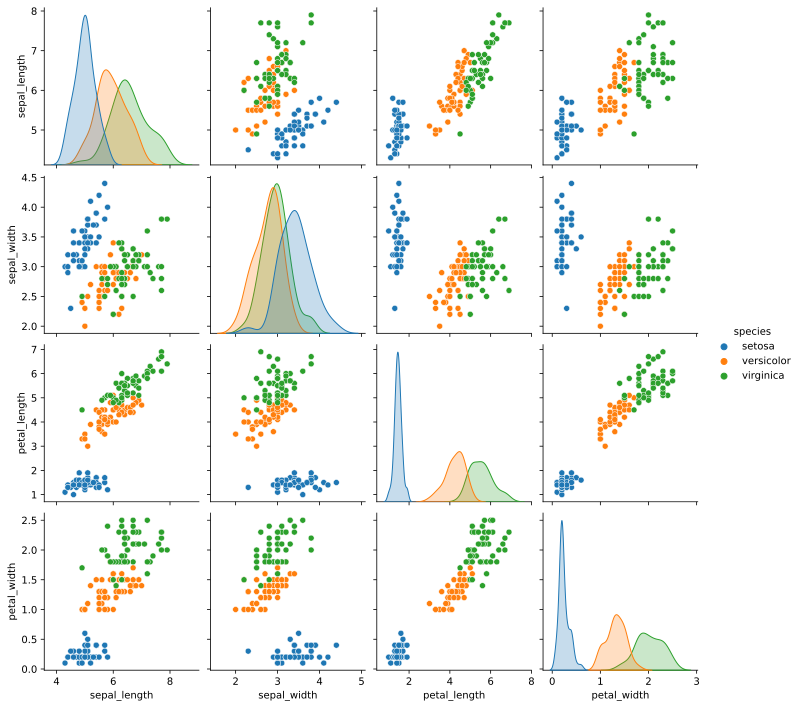

In [24]:
# Create some plots using sns library
sns.pairplot(iris, hue="species")
plt.show()

In [25]:
# Convert the data from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers
labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species=="setosa"] = 0 # (we don't need this)
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2

labels
# In general we randomize the data, but we will see it later

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Create the fully-connectede model

In [26]:
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    )

ANNiris

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

In [27]:
# Model Architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    )

# Define the loss function
lossfun = nn.CrossEntropyLoss() # This includes softmax, no need to call it in model above

# define the optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr = 0.01)

In [28]:
# define the number of epochs
numepochs = 1000

# initialize the losses
losses = torch.zeros(numepochs)

# Accuracy at each training step
ongoinAcc = []

# Loop over the epochs
for epochi in range(numepochs):

    # forwad pass
    yHat = ANNiris(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute the accuracy
    matches = torch.argmax(yHat,axis=1) == labels # returns true/false
    matchesNumeric = matches.float()
    accuracyPPc = 100*torch.mean(matchesNumeric)
    ongoinAcc.append(accuracyPPc)

# Final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels==labels).float())
print("Total Accuracy is {}%".format(totalacc))

Total Accuracy is 98.0%


In [29]:
yHat.shape

torch.Size([150, 3])

In [30]:
# take max in each row
yHat[0:10,:]

tensor([[  8.4608,   3.2420, -12.6860],
        [  7.4601,   3.0086, -11.3838],
        [  7.7201,   2.9866, -11.6195],
        [  7.1284,   2.9501, -10.9583],
        [  8.4962,   3.2363, -12.7095],
        [  8.7636,   3.4462, -13.2355],
        [  7.6637,   2.9859, -11.5504],
        [  8.1028,   3.1903, -12.2434],
        [  6.7514,   2.8018, -10.3949],
        [  7.6023,   3.0942, -11.6127]], grad_fn=<SliceBackward0>)

In [31]:
# Since row 1 has the largest value, argmax will chose first row because it has the largest element
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

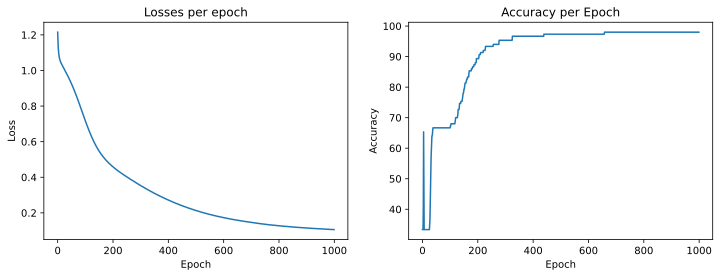

In [32]:
# Visualize the results
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Losses per epoch")

ax[1].plot(ongoinAcc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Accuracy per Epoch")

plt.show()

In [33]:
# Confirm that all model predictions sum to 1 when using softmax
sm = nn.Softmax(1)
torch.sum(yHat,axis=1)

tensor([-0.9832, -0.9150, -0.9128, -0.8798, -0.9771, -1.0257, -0.9008, -0.9502,
        -0.8417, -0.9162, -1.0300, -0.9239, -0.9012, -0.8659, -1.1619, -1.1137,
        -1.0580, -0.9787, -1.0596, -0.9897, -0.9982, -0.9791, -0.9695, -0.9824,
        -0.9600, -0.9295, -0.9502, -0.9862, -0.9902, -0.9000, -0.9046, -1.0067,
        -1.0425, -1.0981, -0.9178, -0.9728, -1.0617, -0.9688, -0.8530, -0.9643,
        -0.9770, -0.8545, -0.8699, -0.9581, -1.0073, -0.9015, -0.9847, -0.8874,
        -1.0156, -0.9533, -2.3008, -2.1850, -2.3592, -1.9112, -2.2215, -2.0803,
        -2.2376, -1.6200, -2.2250, -1.8622, -1.6879, -2.0377, -1.9260, -2.1925,
        -1.8043, -2.1734, -2.0846, -1.9549, -2.1402, -1.8891, -2.2243, -1.9825,
        -2.2649, -2.1779, -2.1106, -2.1693, -2.3062, -2.3682, -2.1337, -1.7168,
        -1.8478, -1.7933, -1.9176, -2.2893, -2.0587, -2.1458, -2.2794, -2.1182,
        -1.9682, -1.9167, -2.0171, -2.1694, -1.9510, -1.6235, -1.9869, -2.0020,
        -2.0054, -2.0930, -1.5209, -1.97

In [34]:
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

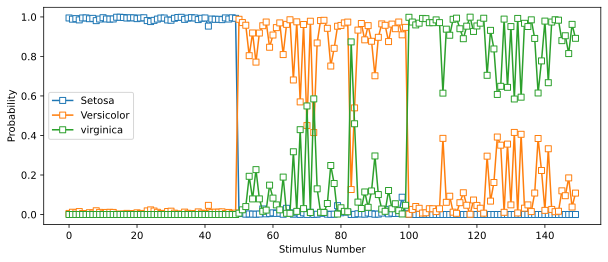

In [35]:
# Plot the raw model outputs
fig = plt.figure(figsize=(10,4))
plt.plot(sm(yHat.detach()),"s-", markerfacecolor="w")
plt.xlabel("Stimulus Number")
plt.ylabel("Probability")
plt.legend(["Setosa", "Versicolor", "virginica"])
plt.show()

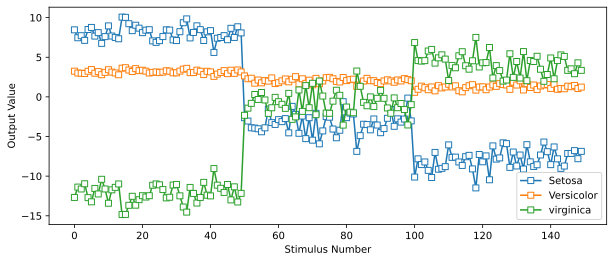

In [36]:
# Without softmax
# Plot the raw model outputs
fig = plt.figure(figsize=(10,4))
plt.plot(yHat.detach(),"s-", markerfacecolor="w")
plt.xlabel("Stimulus Number")
plt.ylabel("Output Value")
plt.legend(["Setosa", "Versicolor", "virginica"])
plt.show()

## Code Challenge

In [37]:
# Create the data
# 100 data points per case
nPerClust = 100

# standard deviation
blur = 1

A = [1,1]
B = [5,1]
C = [3,-2]

# generate the data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)), 1 + np.ones((nPerClust,1))))

# Concatenate into matrix
data_np = np.hstack((a,b,c)).T

# Convert data to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

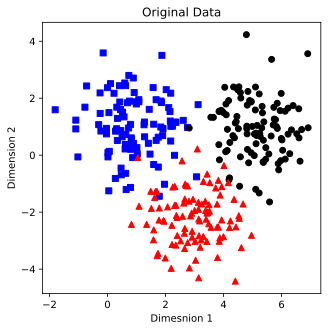

In [38]:
# Plot
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko")
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1],"r^")
plt.title("Original Data")
plt.xlabel("Dimesnion 1")
plt.ylabel("Dimension 2")
plt.show()

In [42]:
# Define the Model Architecture
ANNq = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Softmax(dim=1), # included softmax explicitly, although not ncessary (see above)
    )

# define the loss function
lossfun = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(ANNq.parameters(), lr=0.01)

In [43]:
# Quick model check
# THIS IS JUST RANDOM TO MAKE SURE THE CODE IS WORKING, BECAUSE MODEL IS NOT TRAINED YET
yHat = ANNq(data)

print(data.shape)
print()
print(yHat.shape)
print()
print(yHat[1:10,:])

torch.Size([300, 2])

torch.Size([300, 3])

tensor([[0.2932, 0.3448, 0.3620],
        [0.2883, 0.3515, 0.3602],
        [0.2603, 0.3290, 0.4107],
        [0.2883, 0.3515, 0.3602],
        [0.2941, 0.3385, 0.3674],
        [0.3483, 0.2404, 0.4113],
        [0.3542, 0.1747, 0.4711],
        [0.2854, 0.3493, 0.3653],
        [0.3570, 0.2208, 0.4222]], grad_fn=<SliceBackward0>)


In [44]:
# Train the model
numepochs = 10000

# losses vecor
losses = np.zeros(numepochs)

# Accuracy at every epoch
ongoinAcc = []

for i in range(numepochs):

    # forward pass
    yHat = ANNq(data)

    # compute the loss
    loss = lossfun(yHat,labels)
    losses[i] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute the accuracy
    matches = torch.argmax(yHat,axis=1) == labels # returns true/false
    matchesNumeric = matches.float()
    accuracyPPc = 100*torch.mean(matchesNumeric)
    ongoinAcc.append(accuracyPPc)

# Final forward pass
predictions = ANNq(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels==labels).float())
print("Total Accuracy is {:.3f}%".format(totalacc))

Total Accuracy is 95.333%


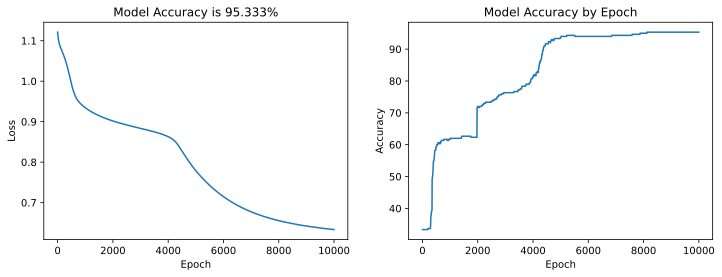

In [45]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model Accuracy is {:.3f}%".format(totalacc))

ax[1].plot(ongoinAcc)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Model Accuracy by Epoch")

plt.show()

In [46]:
yHat[1:10,]

tensor([[9.9645e-01, 1.7151e-03, 1.8332e-03],
        [9.8608e-01, 9.2081e-03, 4.7140e-03],
        [9.9959e-01, 8.2521e-05, 3.2875e-04],
        [9.9357e-01, 3.6131e-03, 2.8177e-03],
        [9.5707e-01, 3.3430e-02, 9.4981e-03],
        [9.9125e-01, 5.3163e-03, 3.4372e-03],
        [9.8595e-01, 2.7944e-03, 1.1257e-02],
        [9.9807e-01, 7.6647e-04, 1.1636e-03],
        [9.8998e-01, 6.2600e-03, 3.7631e-03]], grad_fn=<SliceBackward0>)

In [47]:
# Conform that all model predictions sum to 1
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

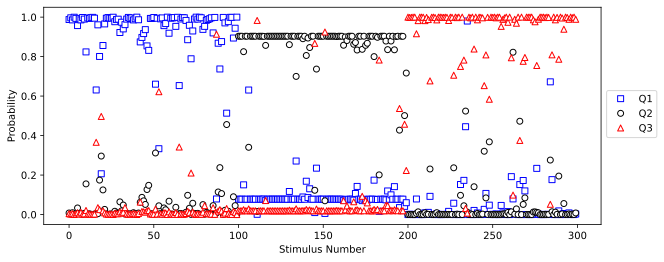

In [48]:
# Plot the raw model outputs
fig = plt.figure(figsize=(10,4))

colorshape = ["bs", "ko", "r^"]

for i in range(3):
    plt.plot(yHat[:,i].detach(), colorshape[i], markerfacecolor="w")

plt.xlabel("Stimulus Number")
plt.ylabel("Probability")
plt.legend(["Q1", "Q2", "Q3"],loc=(1.01,0.4))
plt.show()

## Effect of the Number of Hidden Units

Goal: Classify flowers dataset using a model with one hidden layer, ut parametrically change the number of hidden units from 1 to 128. Plot the classification accuracy as a function of model size.

In [49]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# Change the dataframe into tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species into numbers
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=="setosa"] = 0
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2

In [51]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Create and Train the Model

In [52]:
# Create the ttraining model
def createIrisModel(nHidden):
    """
    Define the number of hidden unit in the function
    """

    # set the model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,3),
        #nn.Softmax(dim=1),
        )
    
    # Define the loss function
    lossfun = nn.CrossEntropyLoss()

    # define the optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossfun, optimizer

In [53]:
# Function to train the model
def trainTheModel(ANNiris):

    # loop over the epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNiris(data)

        # compute the loss
        loss = lossfun(yHat,labels)
        #losses[epochi] = loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass
    predictions = ANNiris(data)

    predlabels = torch.argmax(predictions,axis=1)
    
    # Return model accuracy
    return 100*torch.mean((predlabels==labels).float())

In [54]:
numepochs = 150
numhiddens = np.arange(1,129)
accuracies = []

for nunits in numhiddens:

    # Fresh model for each run
    ANNiris, lossfun, optimizer = createIrisModel(nunits)

    # Run the model
    acc = trainTheModel(ANNiris)
    accuracies.append(acc)

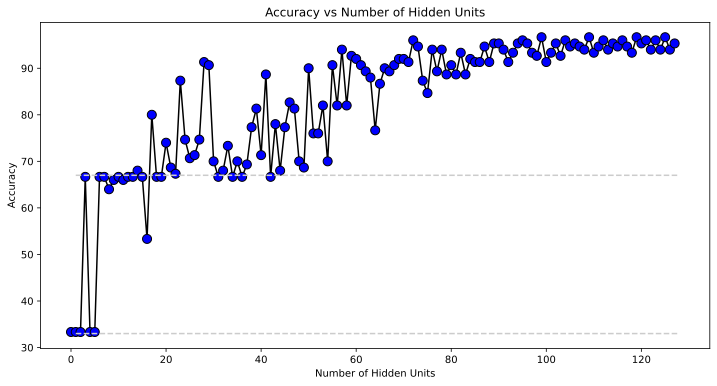

In [55]:
# Plot
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies, "ko-", markerfacecolor="b", markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33], "--", color=[0.8,0.8,0.8])
ax.plot(numhiddens[[0,-1]],[67,67], "--", color=[0.8,0.8,0.8])
ax.set_xlabel("Number of Hidden Units")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Number of Hidden Units")
plt.show()

In [56]:
# Train the model with more epochs
numepochs = 500
numhiddens = np.arange(1,129)
accuracies = []

for nunits in numhiddens:

    # Fresh model for each run
    ANNiris, lossfun, optimizer = createIrisModel(nunits)

    # Run the model
    acc = trainTheModel(ANNiris)
    accuracies.append(acc)

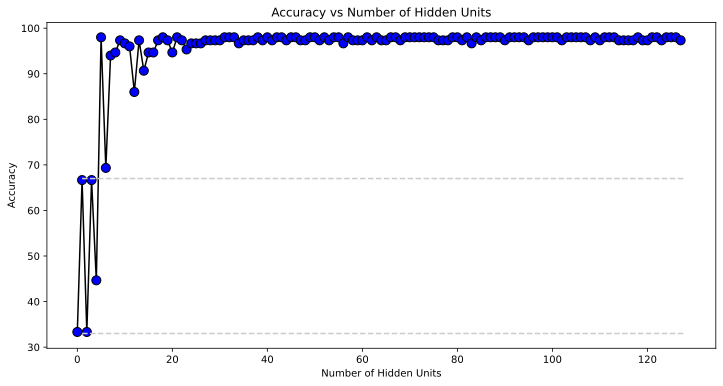

In [57]:
# Plot
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies, "ko-", markerfacecolor="b", markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33], "--", color=[0.8,0.8,0.8])
ax.plot(numhiddens[[0,-1]],[67,67], "--", color=[0.8,0.8,0.8])
ax.set_xlabel("Number of Hidden Units")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Number of Hidden Units")
plt.show()

In [58]:
# Train the model with more epochs
numepochs = 500
numhiddens = np.arange(1,129,14)
accuracies = []

for nunits in numhiddens:

    # Fresh model for each run
    ANNiris, lossfun, optimizer = createIrisModel(nunits)

    # Run the model
    acc = trainTheModel(ANNiris)
    accuracies.append(acc)

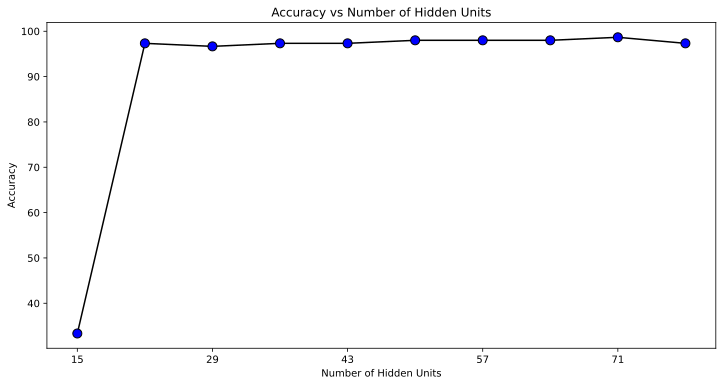

In [59]:
# Plot
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies, "ko-", markerfacecolor="b", markersize=9)
ax.set_xticklabels(numhiddens)
ax.set_xlabel("Number of Hidden Units")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Number of Hidden Units")
plt.show()

## Model Breadth vs Depth

In [60]:
# Build two models
widenet = nn.Sequential(
    nn.Linear(2,4),
    nn.Linear(4,3),
    )

deepnet = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,2),
    nn.Linear(2,3),
    )

# Print them out to have a look of the output
print(widenet)
print()
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [61]:
# networks are instance of class, so they have a list of atttributes
widenet

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)

In [62]:
deepnet

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)

### Check in More Details Inside the Network

In [63]:
# Check out network parameters
for p in deepnet.named_parameters():
    print(p)
    print()

# These are tooples with two elements

('0.weight', Parameter containing:
tensor([[-0.2735, -0.4777],
        [-0.1392,  0.1166]], requires_grad=True))

('0.bias', Parameter containing:
tensor([ 0.0689, -0.4481], requires_grad=True))

('1.weight', Parameter containing:
tensor([[-0.2555,  0.1350],
        [-0.5622,  0.2865]], requires_grad=True))

('1.bias', Parameter containing:
tensor([0.1028, 0.4573], requires_grad=True))

('2.weight', Parameter containing:
tensor([[-0.1278, -0.2735],
        [ 0.6883, -0.2566],
        [ 0.1048, -0.4258]], requires_grad=True))

('2.bias', Parameter containing:
tensor([ 0.2261, -0.3561, -0.0709], requires_grad=True))



In [64]:
# Count the total number of nodes by counting biases: Every node has bias associated with it!
numNodesInWide = 0
for p in widenet.named_parameters():
    if "bias" in p[0]:
        numNodesInWide += len(p[1])

numNodesInDeep = 0
for paramName, paramVect in deepnet.named_parameters():
    if "bias" in paramName:
        numNodesInDeep += len(paramVect)

print("There are {} nodes in the wide network".format(numNodesInWide))
print()
print("There are {} nodes in the deep network".format(numNodesInDeep))

There are 7 nodes in the wide network

There are 7 nodes in the deep network


In [65]:
# Count just the parameters
for p in widenet.parameters():
    print(p)
    print()

Parameter containing:
tensor([[ 0.2808,  0.5313],
        [ 0.0692,  0.1916],
        [-0.5702,  0.4861],
        [ 0.6806,  0.6517]], requires_grad=True)

Parameter containing:
tensor([0.5527, 0.4198, 0.3046, 0.1772], requires_grad=True)

Parameter containing:
tensor([[-0.3556, -0.3496,  0.4524, -0.3285],
        [-0.3159, -0.2045,  0.1454,  0.3824],
        [ 0.3556,  0.1261, -0.4564,  0.2863]], requires_grad=True)

Parameter containing:
tensor([ 0.4092,  0.3967, -0.2109], requires_grad=True)



In [66]:
# Count the total number of trainable parameters
nparams = 0
for p in widenet.parameters():
    if p.requires_grad:
        print("This piece has {} parameters".format(p.numel()))
        nparams += p.numel()

print("\nTotal of {} parameters".format(nparams))

This piece has 8 parameters
This piece has 4 parameters
This piece has 12 parameters
This piece has 3 parameters

Total of 27 parameters


In [67]:
# Same for deep network
nparams = 0
for p in deepnet.parameters():
    if p.requires_grad:
        print("This piece has {} parameters".format(p.numel()))
        nparams += p.numel()

print("\nTotal of {} parameters".format(nparams))

This piece has 4 parameters
This piece has 2 parameters
This piece has 4 parameters
This piece has 2 parameters
This piece has 6 parameters
This piece has 3 parameters

Total of 21 parameters


In [68]:
# Do the same using list comprehension
nparams = np.sum([p.numel() for p in widenet.parameters() if p.requires_grad])
print("Widenet has {} parameters".format(nparams))

nparams = np.sum([p.numel() for p in deepnet.parameters() if p.requires_grad])
print("deepnet has {} parameters".format(nparams))

Widenet has 27 parameters
deepnet has 21 parameters


In [69]:
# Print model information (very cool)
from torchsummary import summary
summary(widenet,(1,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [70]:
summary(deepnet, (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]               6
            Linear-2                 [-1, 1, 2]               6
            Linear-3                 [-1, 1, 3]               9
Total params: 21
Trainable params: 21
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Using Class to Define Models

In [71]:
# New necessary functions
import torch.nn.functional as F
# Access to some functions used as classes for which we create instances and call methods

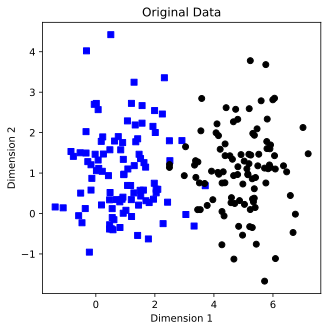

In [72]:
# Create the data
# 100 data points per case
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Visualize
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko")
plt.title("Original Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [73]:
# Inspect data types
print(type(data_np))
print()
print(np.shape(data_np))
print()
print(type(data))
print()
print(np.shape(data))

<class 'numpy.ndarray'>

(200, 2)

<class 'torch.Tensor'>

torch.Size([200, 2])


In [ ]:
# Build the Model; just for reference
#ANNclassify = nn.Sequential(
#    nn.Linear(2,1),
#    nn.Relu()
#    nn.Linear(1,1),
#    nn.Sigmoid(),
#    )

In [74]:
# Define the class
class theClass4ANN(nn.Module):
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(2,1)
        
        ### output layer
        self.output = nn.Linear(1,1)

    # forward pass
    def forward(self,x):

        # pass through the input layer
        x = self.input(x)

        # apply relu
        x = F.relu( x )

        # output layer
        x = self.output(x)
        x = torch.sigmoid(x)

        return x


### create an instance of the class
ANNclassify = theClass4ANN()

In [75]:
ANNclassify

theClass4ANN(
  (input): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=1, bias=True)
)

In [76]:
# Define other model features
# learning rate
learningRate = 0.01

# loss function
lossfun = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [77]:
# Now train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

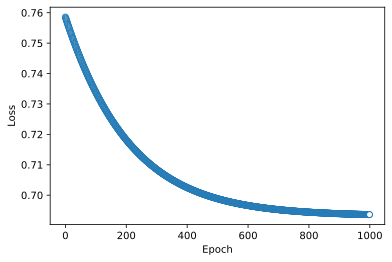

In [78]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [79]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 50%


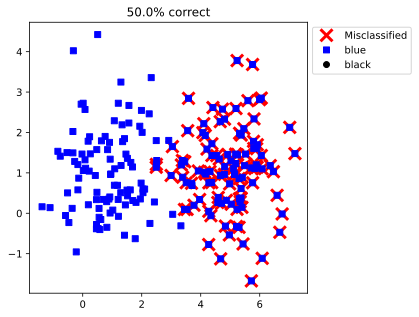

In [80]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

## ANN Depth vs Breadth

In [81]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# Convert from pandas to dataframe
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=="setosa"] = 0
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2

In [83]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Just check the model is working fine

In [84]:
# Create a class for the model

class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        # creata e dictionary to store the layers
        self.layers = nn.ModuleDict() # special dictionary coming with pytorch to store layers
        self.nLayers = nLayers

        # input layer
        self.layers["input"] = nn.Linear(4,nUnits) # 4 is input features

        # Hidden Layers
        for i in range(nLayers):
            self.layers[f"hidden{i}"] = nn.Linear(nUnits,nUnits)

        # Output layer
        self.layers["output"] = nn.Linear(nUnits,3) # 3 classes as outputs

    # forward pass
    def forward(self,x):
        # inut layer
        x = self.layers["input"](x)

        # hidden layers
        for i in range(self.nLayers):
            x = F.relu(self.layers[f"hidden{i}"](x))
        
        # return output layer
        x = self.layers["output"](x)

        return x

In [85]:
# Generate an instance of the model and inspect it
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer, nLayers)

net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [86]:
# Run a quick test to ensure the architecture is ok
# 10 samples, 4 dimensions
tmpx = torch.randn(10,4)

# run it through the DL
y = net(tmpx)

# check the shape
print(y.shape)
print()
print(y)

torch.Size([10, 3])

tensor([[ 0.1144, -0.0706,  0.2219],
        [ 0.1130, -0.0673,  0.2296],
        [ 0.1140, -0.0595,  0.2216],
        [ 0.1140, -0.0648,  0.2303],
        [ 0.1041, -0.0651,  0.2256],
        [ 0.1144, -0.0692,  0.2269],
        [ 0.1088, -0.0664,  0.2325],
        [ 0.1055, -0.0654,  0.2281],
        [ 0.1139, -0.0653,  0.2239],
        [ 0.1137, -0.0603,  0.2229]], grad_fn=<AddmmBackward0>)


### Create a Function to Train the Model

In [87]:
# function to train the model

def trainTheModel(theModel):

    # definle loss function and the optimizer
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(theModel.parameters(), lr = 0.1)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = theModel(data)

        # compute loss
        loss = lossfun(yHat,labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass to get the accuracy
    predictions = theModel(data)
    predlabels = torch.argmax(predictions,axis=1)
    acc = 100*torch.mean((predlabels==labels).float())

    # Total numberf of trainable parameters
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    # functions output
    return acc, nParams

In [88]:
# Test the function once
numepochs = 2500
acc, nParams = trainTheModel(net)

acc # accuracy, number of parameters in the model

tensor(98.6667)

In [89]:
nParams

723

In [90]:
# Get to the real experiment
# define the model parameters
numlayers = range(1,6) # number of hidden layers
numunits = np.arange(4,101,3)  # Units per hidden layers

# Initialize the output metrics
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

# number of training epochs
numepochs = 500

# Start the experiment
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):

        # create a fresh model instance
        net = ANNiris(numunits[unitidx], numlayers[layeridx])

        # Run the model and store the results
        acc, nParams = trainTheModel(net)
        accuracies[unitidx,layeridx] = acc

        # Store the total number of parameters in the model
        totalparams[unitidx,layeridx] = nParams

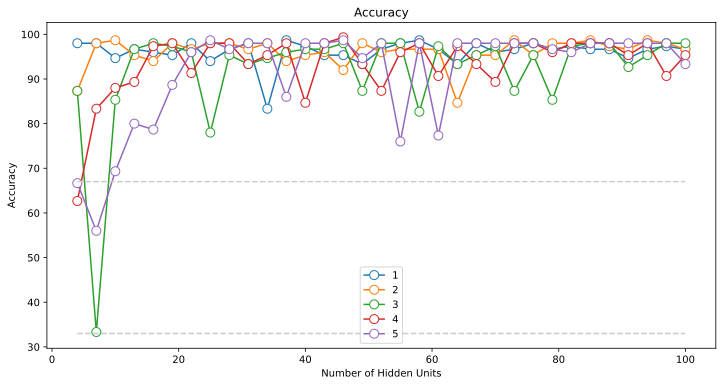

In [91]:
fig,ax = plt.subplots(1, figsize=(12,6))

ax.plot(numunits, accuracies, "o-", markerfacecolor="w", markersize=9)
ax.plot(numunits[[0,-1]],[33,33], "--", color=[0.8,0.8,0.8])
ax.plot(numunits[[0,-1]],[67,67], "--", color=[0.8,0.8,0.8])
ax.legend(numlayers)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Hidden Units")
ax.set_title("Accuracy")
plt.show()
# Deeper models are not necessary better

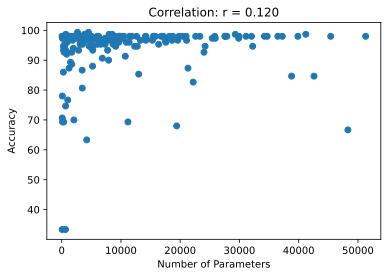

In [88]:
# Plot parameters
# Vectorize for convenience
x = totalparams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x,y)[0,1]

# scatterplot
plt.plot(x,y, "o")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.title("Correlation: r = {:.3f}".format(r))
plt.show()

In [ ]:
# Run the same model with 1000 training epochs, any change
numlayers = range(1,6) # number of hidden layers
numunits = np.arange(4,101,3)

# Initialize the output metrics
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

# number of training epochs
numepochs = 1000

# Start the experiment
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):

        # create a fresh model instance
        net = ANNiris(numunits[unitidx], numlayers[layeridx])

        # Run the model and store the results
        acc, nParams = trainTheModel(net)
        accuracies[unitidx,layeridx] = acc

        # Store the total number of parameters in the model
        totalparams[unitidx,layeridx] = nParams

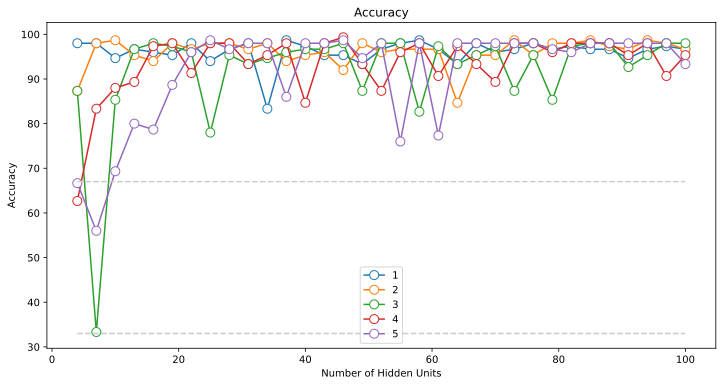

In [92]:
fig,ax = plt.subplots(1, figsize=(12,6))

ax.plot(numunits, accuracies, "o-", markerfacecolor="w", markersize=9)
ax.plot(numunits[[0,-1]],[33,33], "--", color=[0.8,0.8,0.8])
ax.plot(numunits[[0,-1]],[67,67], "--", color=[0.8,0.8,0.8])
ax.legend(numlayers)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Hidden Units")
ax.set_title("Accuracy")
plt.show()
# More epochs improve the model

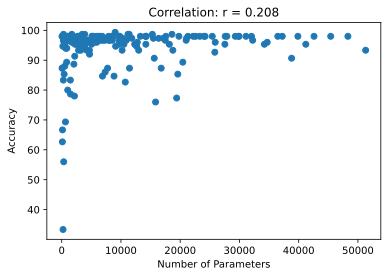

In [93]:
x = totalparams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x,y)[0,1]

# scatterplot
plt.plot(x,y, "o")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.title("Correlation: r = {:.3f}".format(r))
plt.show()

## Code Challenge: Convert Sequential to Class

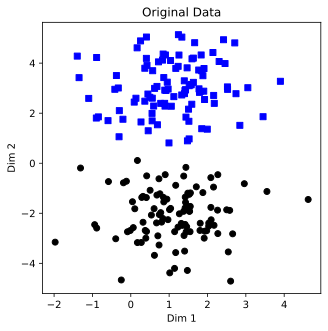

In [95]:
from numpy.core.shape_base import hstack
# Generate new data
nPerClust = 100
blur = 1
A = [1,3]
B = [1,-2]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

data_np = hstack((a,b)).T
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# Convert to torch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko")
plt.title("Original Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [ ]:
# # the sequential model we want to create as class

# def createANNmodel(learningRate):

#     # Model Architecture
#     ANNclassify = nn.Sequential(
#         nn.lINEAR(2,16),
#         nn.ReLU(),
#         nn.Linear(16,1),
#         nn.ReLU(),
#         nn.Linear(1,1),
#         nn.Sigmoid(),
#         )
#     # Loss Function
#     lossfun = nn.BCELoss()

#     # Optimizer
#     optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

#     # Output
#     return ANNclassify, lossfun, optimizer

In [96]:
# Create the class
def createANNmodel(learningRate):

    class ANNiris(nn.Module):
        def __init__(self):
            super().__init__()

            # Input layer
            self.input = nn.Linear(2,16)

            # hidden layer
            self.hidden = nn.Linear(16,1)

            # output layer
            self.output = nn.Linear(1,1)

        # Forward Pass
        def forward(self,x):

            # Inout layer
            x = self.input(x)
            x = F.relu(x)

            # hidden layer
            x = self.hidden(x)
            x = F.relu(x)

            # Return the output layer
            x = self.output(x)
            x = torch.sigmoid(x)

            return x

    # Create the model architecture
    ANNclassify = ANNiris()

    # Loss Function
    lossfun = nn.BCELoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningRate)

    # Model Output
    return ANNclassify, lossfun, optimizer

In [97]:
# Function to train the model

numepochs = 1000

def trainTheModel(ANNmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over the epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANNmodel(data)

    # Compute predictions and report accuracy
    totalacc = 100*torch.mean(((predictions>0.5)==labels).float())

    return losses, predictions, totalacc

In [98]:
# Run it once to test the output
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

# run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# Report the accuracy
print("Final accuracy is {:.3f}%".format(totalacc))

Final accuracy is 99.500%


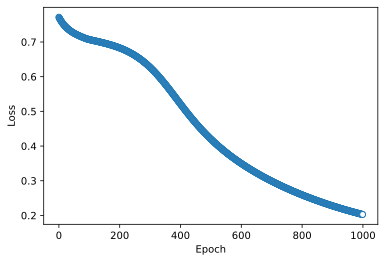

In [99]:
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [100]:
predlabels = predictions>.5
# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 99.5%


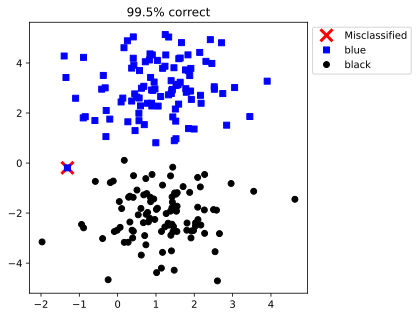

In [101]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()